In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
%matplotlib inline
plt.style.use('seaborn-white')

import statsmodels.api as sm
from patsy import dmatrices
import random as rn

In [2]:
np.random.seed(1)
x1=np.random.rand(100,1)

In [3]:

x2 = 0.5*x1 + np.random.normal(size = (100, 1))/10
y = 2 + 2*x1 + 0.3*x2 + np.random.normal(size = (100, 1))

In [4]:
np.corrcoef(x1, x2, rowvar = False)

array([[1.        , 0.83905962],
       [0.83905962, 1.        ]])

[Text(0.5, 0, 'x1'), Text(0, 0.5, 'x2')]

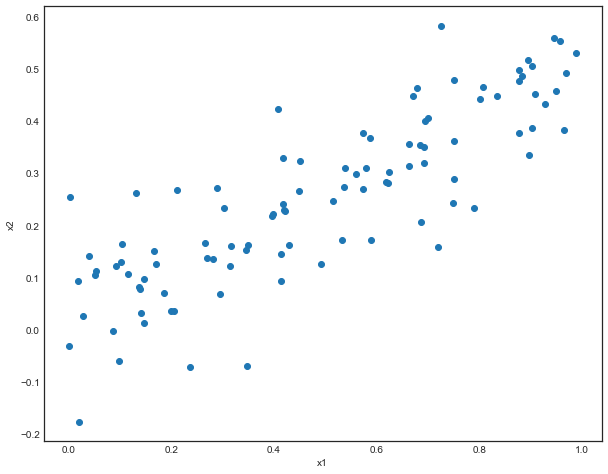

In [20]:
fig = plt.figure(figsize = (10, 8))
ax = plt.axes()
ax.scatter(x1, x2)
ax.set(xlabel = "x1", ylabel = "x2")

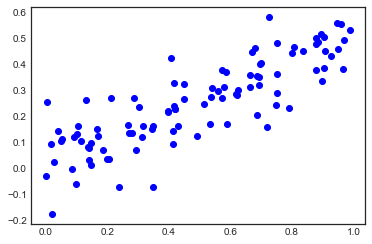

In [6]:
plt.scatter(x1,x2, color='blue')

In [7]:
y,x=dmatrices('y~x1+x2')
model = sm.OLS(y,x)

In [8]:
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           4.40e-07
Time:                        19:00:41   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1893      0.199     11.021      0.000       1.795       2.584
x1             0.7046      0.637      1.107      0.271      -0.559       1.968
x2             2.5024      1.140      2.194      0.031       0.239       4.766
==============================================================================
Omnibus:                        0.607   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.577
Skew:                          -0.179   Prob(JB):                        0.749
Kurtosis:                       2.900   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

SO, ORIGINAL coefficients were 2,2,0.3 but from our model , we got 2.189,0.7046 and 2.5024

#### No, we cannot reject the null hypothesis for x1 but we can reject it for x2 as the p-value 0.031 is small

In [23]:
result.conf_int(0.05)

array([[ 1.79500997,  2.58355883],
       [-0.5591746 ,  1.96843168],
       [ 0.23896175,  4.76584816]])

In [9]:
y,x=dmatrices('y~x1')


model2= sm.OLS(y,x)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           6.68e-07
Time:                        19:00:41   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2486      0.201     11.209      0.000       1.850       2.647
x1             1.8770      0.353      5.316      0.000       1.176       2.578
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.468
Skew:                          -0.003   Prob(JB):                        0.791
Kurtosis:                       2.665   Cond. No.                         4.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### yes here we can reject the null hypothesis for x1 as p-value is small


In [10]:
y,x=dmatrices('y~x2')
mode= sm.OLS(y,x)
resul=mode.fit()
resul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.09e-07
Time:                        19:00:42   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2655      0.187     12.145      0.000       1.895       2.636
x2             3.5613      0.621      5.733      0.000       2.329       4.794
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.746
Skew:                          -0.210   Prob(JB):                        0.689
Kurtosis:                       2.946   Cond. No.                         6.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### we can reject the null hypothesis for x2 as p-value is small

In [11]:
x1_new = np.concatenate((x1, [[0.1]]))
x2_new = np.concatenate((x2, [[0.8]]))
y_new = np.concatenate((y, [[6]]))

In [12]:
np.corrcoef(x1_new, x2_new, rowvar = False)

array([[1.        , 0.74883922],
       [0.74883922, 1.        ]])

In [13]:
y,x=dmatrices('y_new~x2_new')
mode= sm.OLS(y,x)
resul=mode.fit()
resul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_new   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     39.99
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           7.41e-09
Time:                        19:00:44   Log-Likelihood:                -144.24
No. Observations:                 101   AIC:                             292.5
Df Residuals:                      99   BIC:                             297.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2331      0.182     12.271      0.000       1.872       2.594
x2_new         3.7216      0.589      6.324      0.000       2.554       4.889
==============================================================================
Omnibus:                        1.271   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.094
Skew:                          -0.255   Prob(JB):                        0.579
Kurtosis:                       2.973   Cond. No.                         6.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
y,x=dmatrices('y_new~x1_new')
mode= sm.OLS(y,x)
resul=mode.fit()
resul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_new   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     21.89
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           9.15e-06
Time:                        19:00:44   Log-Likelihood:                -151.28
No. Observations:                 101   AIC:                             306.6
Df Residuals:                      99   BIC:                             311.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3583      0.208     11.331      0.000       1.945       2.771
x1_new         1.7225      0.368      4.679      0.000       0.992       2.453
==============================================================================
Omnibus:                        1.904   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.386   Jarque-Bera (JB):                1.388
Skew:                           0.263   Prob(JB):                        0.500
Kurtosis:                       3.232   Cond. No.                         4.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
y,x=dmatrices('y_new~x1_new+x2_new')
mode= sm.OLS(y,x)
resul=mode.fit()
resul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_new   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     19.92
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           5.51e-08
Time:                        19:00:45   Log-Likelihood:                -144.15
No. Observations:                 101   AIC:                             294.3
Df Residuals:                      98   BIC:                             302.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1996      0.199     11.041      0.000       1.804       2.595
x1_new         0.2200      0.520      0.423      0.673      -0.812       1.252
x2_new         3.4392      0.892      3.857      0.000       1.670       5.209
==============================================================================
Omnibus:                        1.246   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                1.094
Skew:                          -0.254   Prob(JB):                        0.579
Kurtosis:                       2.956   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'residuals')

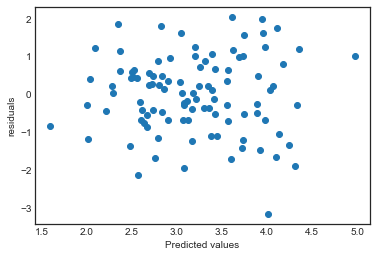

In [18]:
pred=resul.fittedvalues
model_residuals = resul.resid
model_norm_residuals =resul.get_influence().resid_studentized_internal
model_leverage = resul.get_influence().hat_matrix_diag
plt.scatter(pred,model_residuals)
plt.xlabel("Predicted values")
plt.ylabel("residuals")

Text(0.5, 0, 'Leverage')

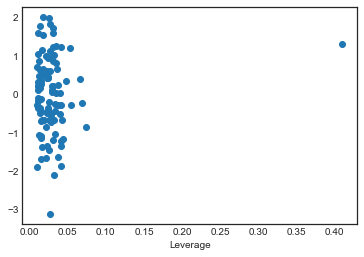

In [17]:
plt.scatter(model_leverage,model_norm_residuals)
plt.xlabel("Leverage")
plt.ylabel("residuals")